### 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1617]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [1618]:
data, target, coef = datasets.make_regression(n_samples=100, n_features = 100, n_informative = 10, n_targets = 1, 
                                              noise = 0, coef = True, random_state = 45)

In [1619]:
# Отмасштабируем признаки
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [1620]:
# Функция получения среднеквадратичного отклонения
def mserror(X, w, y):
    y_pred = np.dot(w, X)
    return np.mean(np.square(y - y_pred))

In [1621]:
# Функция получения среднеквадратичного отклонения для стохастического градиентного спуска
def mserror_stoh(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [1622]:
# Градиентный спуск
def fit_linear_model(X, y, learning_rate, n_iters):
    w = np.random.randn(X.shape[0])
    errors_history, w_history = [], [w]

    for n_iter in range(n_iters):
        y_pred = np.dot(w, X)
        errors_history.append(mserror(X, w, y))
        w = w - 2 * learning_rate * np.sum(X * (y_pred - y), axis=1) / len(y_pred)
        w_history.append(w)
        
    w_history = np.array(w_history)
    return w, w_history, errors_history

In [1623]:
# Стохастический градиентный спуск
def fit_stoh_model(X, y, learning_rate, n_iters):
    w = np.random.randn(X.shape[0])
    errors_history, w_history = [], [w]
    
    for n_iter in range(n_iters):
        y_pred = np.dot(w, X)
        
        train_ind = np.random.randint(X.shape[0])        
        w = w - 2 * learning_rate * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]
        errors_history.append(mserror_stoh(X, w, y))
        w_history.append(w)

    w_history = np.array(w_history)        
    return w, w_history, errors_history

In [1624]:
# функция построения графиков
def create_plot(errors_history, errors_history_stoh):
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.title('Сравнение ошибок градиентного и стохастического градиентных спусков')
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')

    ax.plot(range(len(errors_history)), errors_history, label='градиентный спуск')
    ax.plot(range(len(errors_history_stoh)), errors_history_stoh, label='стохастический градиентный спуск')
    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
    plt.show()

In [1625]:
# Параметры для обучения моделей
# Скорость обучения
learning_rate = 0.01
# Количество итераций
n_iters = 30000

In [1626]:
# Обучим модель при помощи градиентного спуска с заданными параметрами
weights, weights_history, errors_history = fit_linear_model(
        data, target, learning_rate=learning_rate, n_iters=n_iters
    )

In [1627]:
# Обучим модель при помощи стохастического градиентного спуска с заданными параметрами
weights_stoh, weights_history_stoh, errors_history_stoh = fit_stoh_model(
        data, target, learning_rate=learning_rate, n_iters=n_iters
    )

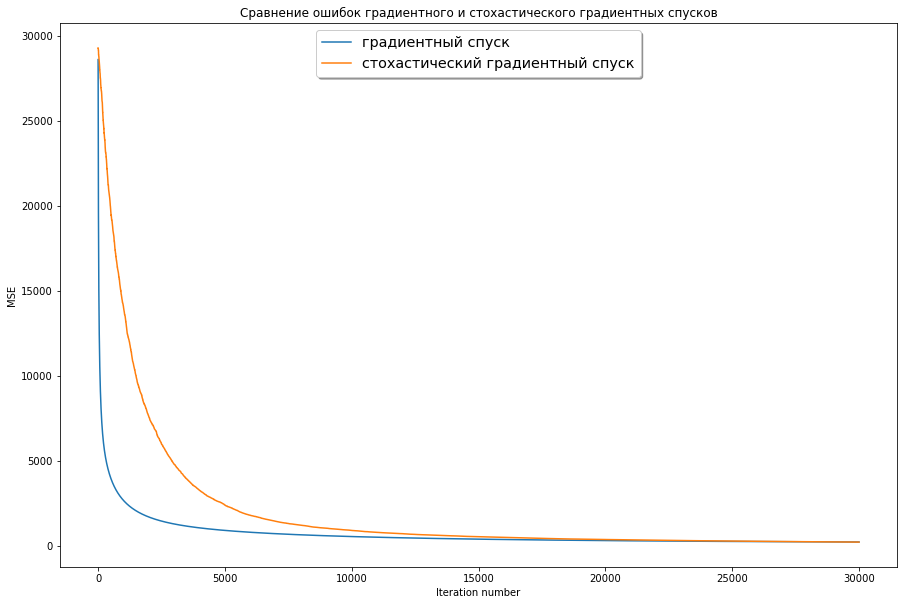

In [1628]:
create_plot(errors_history, errors_history_stoh)

### Вывод:
Для данного набора данных градиентный спуск быстрее достигает минимальной ошибки.